In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score

In [10]:
# Getting path of folders and their images
path_to_images = 'H:\FINAL PROJECT DATASET\Dataset'

img_folders = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        img_folders.append(entry.path)
img_folders

['H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Moderate_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Non_Demented',
 'H:\\FINAL PROJECT DATASET\\Dataset\\Very_Mild_Demented']

In [11]:
# Creating a dictionary of images and their labels from each folder path

img_dict = {}
for folder in img_folders:
    img_dict[folder] = []
    for entry in os.scandir(folder):
        if entry.is_file():
            img_dict[folder].append(entry.path)
img_dict

{'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented': ['H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_10.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_100.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_101.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_102.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_103.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_104.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_105.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_106.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_107.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_108.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_109.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mild_11.jpg',
  'H:\\FINAL PROJECT DATASET\\Dataset\\Mild_Demented\\mi

In [12]:
# Creating a dataframe of images and their labels

img_df = pd.DataFrame(columns=["image", "label"])
for folder in img_dict:
    for img in img_dict[folder]:
        img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
img_df

C:\Users\hp\AppData\Local\Temp\ipykernel_3200\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3200\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3200\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df = img_df.append({"image": img, "label": folder.split("\\")[-1]}, ignore_index=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_3200\753985834.py:6: FutureWarning: The frame.append method is deprecated and will be removed f

,image,label
0,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
1,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
2,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
3,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
4,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
...,...,...
6395,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6396,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6397,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
6398,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented


In [13]:
# Shuffling the dataframe

img_df = shuffle(img_df)
img_df

,image,label
4605,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
3005,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
3747,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
3080,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
1792,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
...,...,...
47,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,Mild_Demented
4486,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,Very_Mild_Demented
1989,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented
3506,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,Non_Demented


In [14]:
# Encoding the labels

encode_map = {"Non_Demented" : 0, "Very_Mild_Demented" : 1, "Mild_Demented" : 2, "Moderate_Demented" : 3}
img_df["label"] = img_df["label"].map(encode_map)
img_df

,image,label
4605,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,1
3005,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
3747,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
3080,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
1792,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
...,...,...
47,H:\FINAL PROJECT DATASET\Dataset\Mild_Demented...,2
4486,H:\FINAL PROJECT DATASET\Dataset\Very_Mild_Dem...,1
1989,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0
3506,H:\FINAL PROJECT DATASET\Dataset\Non_Demented\...,0


In [15]:
# Creating X and y by reading images and their labels

X = []
y = []

for img_path, label in zip(img_df["image"].values, img_df["label"].values):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(label)
X = np.array(X)
y = np.array(y)

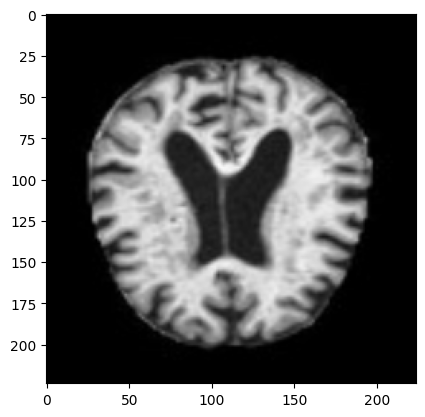

In [16]:
plt.imshow(X[0])

In [17]:
X.shape, y.shape

((6400, 224, 224, 3), (6400,))

In [18]:
img_df.isna().sum()

image    0
label    0
dtype: int64

In [19]:
# Splitting the data into train, validation and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [20]:
# Load pre-trained VGG16 model
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [21]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [23]:
vgg16_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build your own model on top of VGG16
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/10
87/87 [==============================] - 812s 9s/step - loss: 6.1308 - accuracy: 0.4993 - val_loss: -6.8225 - val_accuracy: 0.6039
Epoch 2/10
87/87 [==============================] - 906s 10s/step - loss: -5.9624 - accuracy: 0.5470 - val_loss: -13.6315 - val_accuracy: 0.5390
Epoch 3/10
87/87 [==============================] - 904s 10s/step - loss: -25.0191 - accuracy: 0.5582 - val_loss: -38.7911 - val_accuracy: 0.6039
Epoch 4/10
87/87 [==============================] - 906s 10s/step - loss: -60.9989 - accuracy: 0.5597 - val_loss: -80.7428 - val_accuracy: 0.6039
Epoch 5/10
87/87 [==============================] - 981s 11s/step - loss: -125.7211 - accuracy: 0.5684 - val_loss: -140.9869 - val_accuracy: 0.5942
Epoch 6/10
87/87 [==============================] - 903s 10s/step - loss: -215.6855 - accuracy: 0.5796 - val_loss: -233.0213 - val_accuracy: 0.6104
Epoch 7/10
87/87 [==============================] - 789s 9s/step - loss: -345.3560 - accuracy: 0.5713 - val_loss: -330.4328 -

In [26]:
# Evaluate the model on the test set
from tensorflow.keras import layers, models, optimizers

y_pred = (model.predict(X_test) > 0.5).astype(int)


80/80 [==============================] - 672s 8s/step


In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.37109375
Precision: 0.3497956458624055
Recall: 0.37109375
F1 Score: 0.2957202681234547
Confusion Matrix:
[[ 217 1063    0    0]
 [ 163  733    0    0]
 [  96  262    0    0]
 [   3   23    0    0]]
